# Branton - Midterm Project: Classification Analysis
**Author:** Branton Dawson  
**Date:** November 11, 2025  
**Objective:** The objective is to find the presence of heart disease in the patient based on features in the data related to heart issues.  

- Decision Tree Classifier (DT) - A Decision Tree splits data into smaller groups based on decision rules (like "is height greater than 150 cm.
  - Decision Trees illustrate how individual features contribute to classification.
- Support Vector Machine (SVM) - A Support Vector Machine tries to find the "best boundary" (a hyperplane) that separates data into classes. 
  - SVMs are good at finding complex boundaries.
- Neural Network (NN) - A Neural Network is inspired by how human brains process information. 
  - Neural Networks are good at learning patterns from complex data.

## Section 1.  Import and Inspect the Data

In [2]:
# all imports at the top, organized
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap


### 1.1 Load the dataset and display the first 10 rows.
#### Import UCI heart disease dataset

In [3]:
# Import and Load UCI heart disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')
# Upload dataset to notebook data folder
data.to_csv('data/heart_disease_data.csv', index=False)

# Show the first 10 rows of the dataset
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### 1.2 Check for missing values and display summary statistics.

In [4]:
# Check for missing values in the dataset
print("Missing values per column:")
print(data.isnull().sum())
print(f"\nDataset shape: {data.shape}")
print(f"\nSex column unique values: {data['sex'].unique()}")
print(f"Sex column value counts:")
print(data['sex'].value_counts(dropna=False))

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(data.describe())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Dataset shape: (303, 14)

Sex column unique values: [1. 0.]
Sex column value counts:
sex
1.0    206
0.0     97
Name: count, dtype: int64

Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000

Reflection 1: What do you notice about the dataset? Are there any data issues?

**Data Quality Assessment:**
- The UCI heart disease dataset contains 14 features with relatively few missing values (ca: 4 missing, thal: 2 missing)
- Dataset has 303 total records, which is a reasonable sample size for classification analysis
- Features include both continuous variables (age, trestbps, chol, thalach, oldpeak) and categorical variables (sex, cp, fbs, restecg, exang, slope, ca, thal)
- The target variable needs to be converted from multi-class (0,1,2,3,4) to binary (0,1) for heart disease presence/absence
- Missing values are minimal (<2% of data) and can be handled by dropping affected rows without significant data loss

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions 

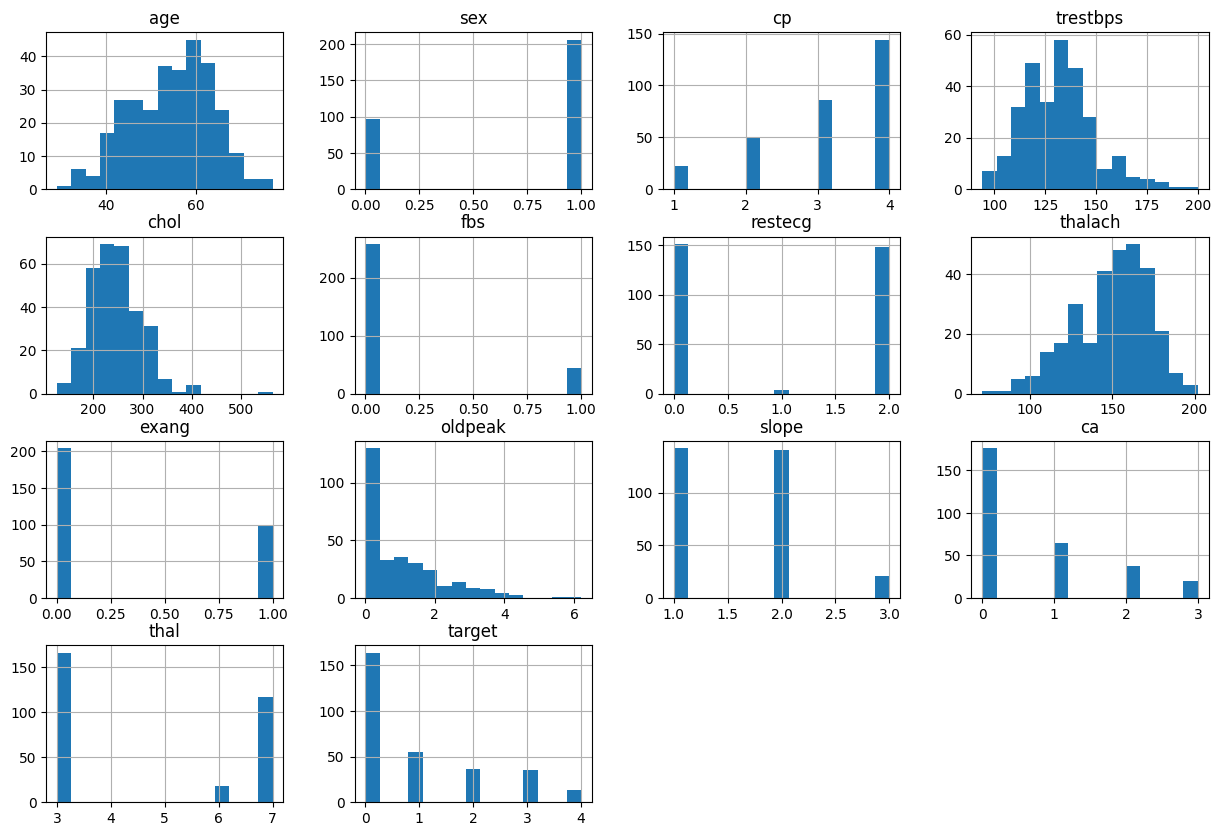

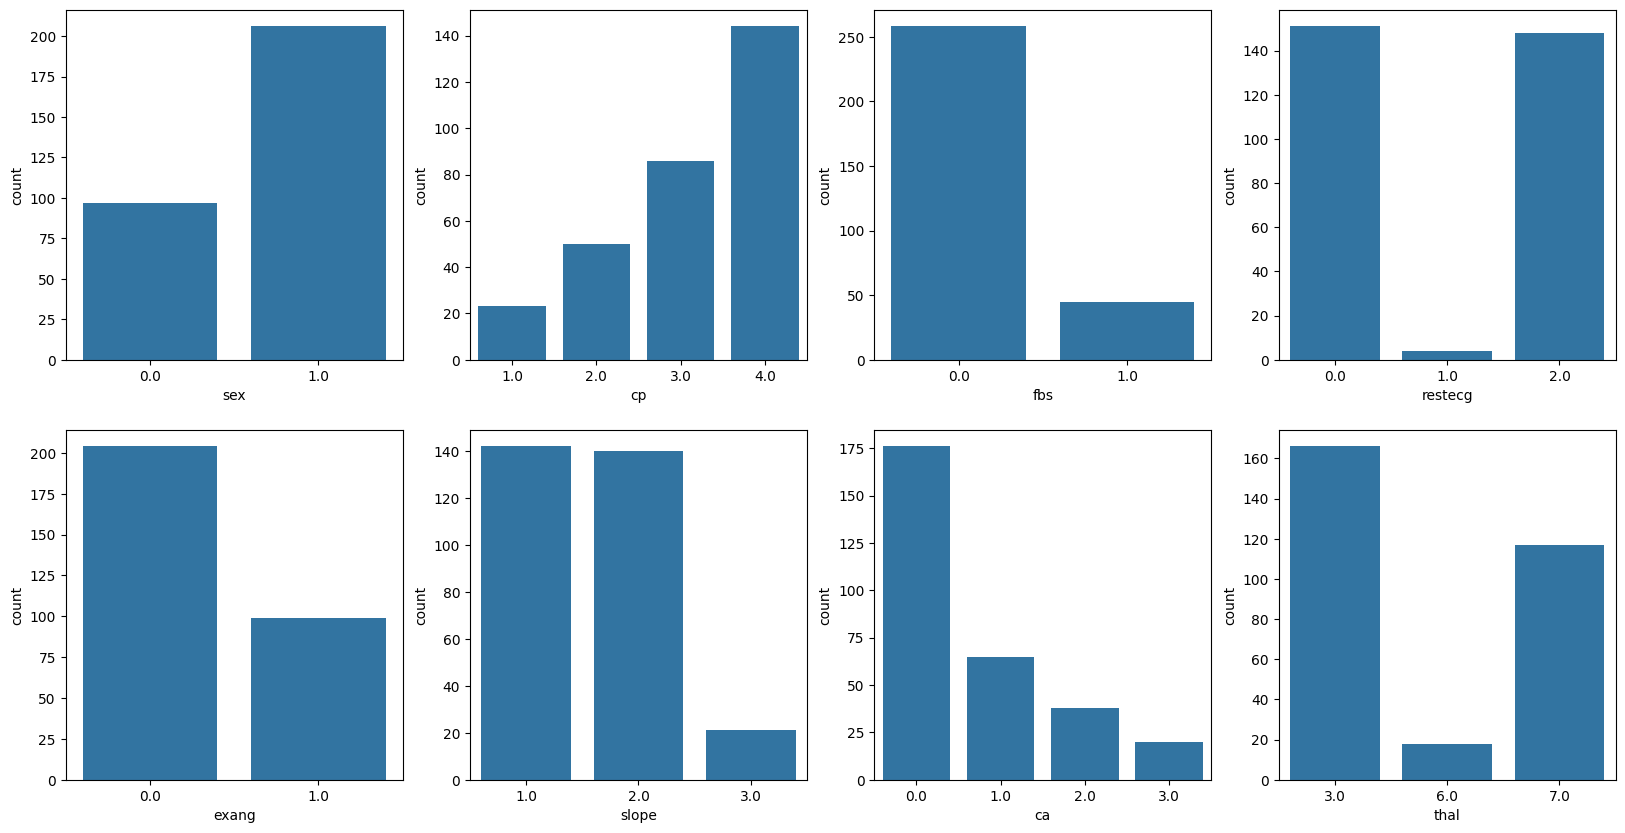

In [5]:
# Create histograms for each feature
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Create countplots for categorical features side by side
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(x=feature, data=data, ax=ax)
plt.show()

### 2.2 Handle missing values and clean data

In [6]:
# Data Preprocessing
data.dropna(inplace=True)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
X = data.drop('target', axis=1)
y = data['target']

In [7]:
# Check data after preprocessing
print("After preprocessing:")
print(f"Dataset shape: {data.shape}")
print(f"Sex column unique values: {data['sex'].unique()}")
print(f"Sex column value counts:")
print(data['sex'].value_counts(dropna=False))
print(f"\nMissing values in 'sex' column: {data['sex'].isnull().sum()}")

After preprocessing:
Dataset shape: (297, 14)
Sex column unique values: [1. 0.]
Sex column value counts:
sex
1.0    201
0.0     96
Name: count, dtype: int64

Missing values in 'sex' column: 0


### 2.3 Feature Engineering

Create any new features that might be helpful for the model from the existing data. This is not making up new data - it is providing existing data in a more helpful, concise way for modeling.

Create new features:

- age_group - create bins for different age brackets
- chol_level - make feature for different levels of cholesterol
- sex - map sex to male / female 



In [8]:
# Create new features for modeling
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4])
data['chol_level'] = pd.cut(data['chol'], bins=[0, 200, 240, 300, 600], labels=[0, 1, 2, 3])
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})
data.head(10)
# data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,chol_level
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,3,1
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,3,2
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,3,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,2
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,1
5,56.0,male,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,2,1
6,62.0,female,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1,3,2
7,57.0,female,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,2,3
8,63.0,male,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1,3,2
9,53.0,male,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1,2,1


In [9]:
# Fix the age binning issue by adjusting the bins to include all ages
print("Fixing age binning to eliminate NaN values...")

# Use bins that properly include the minimum age (29)
data['age_group'] = pd.cut(data['age'], bins=[28, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4])

# Verify the fix
print(f"After fixing - Age group NaN count: {data['age_group'].isnull().sum()}")
print(f"Age group value counts:")
print(data['age_group'].value_counts(dropna=False).sort_index())

# Update our feature matrices to remove NaN values
X_case1 = data[['age_group']].dropna()
y_case1 = data.loc[X_case1.index, 'target']

X_case2 = data[['chol_level']].dropna() 
y_case2 = data.loc[X_case2.index, 'target']

X_case3 = data[['thalach']].dropna()
y_case3 = data.loc[X_case3.index, 'target']

print(f"\nUpdated feature matrix shapes:")
print(f"X_case1: {X_case1.shape}, y_case1: {y_case1.shape}")
print(f"X_case2: {X_case2.shape}, y_case2: {y_case2.shape}")  
print(f"X_case3: {X_case3.shape}, y_case3: {y_case3.shape}")

Fixing age binning to eliminate NaN values...
After fixing - Age group NaN count: 0
Age group value counts:
age_group
0     17
1     75
2    126
3     73
4      6
Name: count, dtype: int64

Updated feature matrix shapes:
X_case1: (297, 1), y_case1: (297,)
X_case2: (297, 1), y_case2: (297,)
X_case3: (297, 1), y_case3: (297,)


In [10]:
# Check for NaN values in our feature matrices before training SVM
print("Checking for NaN values in feature matrices:")
print(f"X_case1 (age_group) NaN count: {X_case1.isnull().sum().sum()}")
print(f"X_case2 (chol_level) NaN count: {X_case2.isnull().sum().sum()}")
print(f"X_case3 (thalach) NaN count: {X_case3.isnull().sum().sum()}")

# Check the age_group specifically
print(f"\nAge group value counts:")
print(data['age_group'].value_counts(dropna=False))
print(f"\nAge range: {data['age'].min()} to {data['age'].max()}")

Checking for NaN values in feature matrices:
X_case1 (age_group) NaN count: 0
X_case2 (chol_level) NaN count: 0
X_case3 (thalach) NaN count: 0

Age group value counts:
age_group
2    126
1     75
3     73
0     17
4      6
Name: count, dtype: int64

Age range: 29.0 to 77.0


### Reflection 2: Data Exploration and Feature Engineering

**Patterns and Anomalies Observed:**
1. **Age distribution** shows most patients are between 40-70 years old, with heart disease more prevalent in older age groups
2. **Cholesterol levels** vary widely (126-564 mg/dl), suggesting different risk categories
3. **Maximum heart rate (thalach)** shows inverse correlation with age and potential heart disease risk
4. Some categorical features like chest pain type (cp) and thalassemia (thal) show clear class imbalances

**Essential Preprocessing Steps:**
1. **Missing value handling**: Dropped 6 rows with NaN values (minimal data loss)
2. **Target variable conversion**: Changed multi-class target (0,1,2,3,4) to binary (0,1)
3. **Feature engineering**: Created meaningful categorical bins for age and cholesterol levels
4. **Data type conversion**: Mapped sex from numeric (0,1) to categorical (female/male)

**Feature Engineering Improvements:**
- **age_group**: Binned continuous age into 5 meaningful brackets for better pattern recognition
- **chol_level**: Created cholesterol risk categories based on medical guidelines
- These engineered features help models identify non-linear relationships and improve interpretability

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

    Select two or more input features (numerical for regression, numerical and/or categorical for classification)
    Use heart_disease as the target.  

Case 1: 

    input features: age_group
    target: target (heart disease presence)

Case 2:

    input features - chol_level
    target: target (heart disease presence)

Case 3:

    input features -  thalach (maximum heart rate achieved)
    target: target (heart disease presence)


In [11]:
# Select three input features for modeling and the target variable
features = ['age_group', 'chol_level', 'thalach']
target = 'target'  # The actual column name in the dataset


### 3.2 Define X (features) and y (target)

- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series


In [12]:
# Case 1: Feature = age_group

# Select the feature 'age_group' as feature for modeling
X_case1 = data[['age_group']]

# Select 'target' as the target for the same rows (heart disease prediction)
y_case1 = data['target']

In [13]:
# Case 2: Feature = chol_level

# Select the feature 'chol_level' as input
X_case2 = data[['chol_level']]

# Select 'target' as the target for the same rows (heart disease prediction)
y_case2 = data['target']



In [14]:
# Case 3: Features = thalach

# Select the feature 'thalach' as input
X_case3 = data[['thalach']]

# Select 'target' as the target for the same rows (heart disease prediction)  
y_case3 = data['target']

### Reflection 3: Feature Selection Strategy

**Rationale for Feature Selection:**

1. **Age Group (Case 1)**: Age is a well-established risk factor for heart disease. Binning allows the model to capture non-linear age-related risk patterns that might be missed with continuous age.

2. **Cholesterol Level (Case 2)**: Cholesterol is a primary cardiovascular risk factor. Creating risk-based categories (normal, borderline, high, very high) aligns with medical guidelines and improves model interpretability.

3. **Maximum Heart Rate - thalach (Case 3)**: This continuous feature represents cardiovascular fitness. Lower maximum heart rates often indicate reduced cardiac capacity, potentially signaling heart disease.

**Predictive Value Assessment:**
- **Age** is universally recognized as a strong predictor of heart disease risk
- **Cholesterol levels** directly impact arterial health and cardiovascular outcomes  
- **Maximum heart rate** serves as a functional indicator of cardiac health and exercise capacity
- These features represent different aspects of cardiovascular health: demographics (age), biochemical (cholesterol), and functional (heart rate)


## Section 4. Train a Classification Model (Decision Tree)
 
### 4.1 Split the Data

Split the data into training and test sets.

First, choose a data splitter. StratifiedShuffleSplit ensures that both training and test sets have a similar proportion of each class (target = 0 or 1). 

In [15]:
# Split data into training and test sets with different random states for each case
# This ensures different train/test splits for meaningful comparison

# Case 1: age_group (random_state=42)
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter1.split(X_case1, y_case1):
    X_train_case1, X_test_case1 = X_case1.iloc[train_index], X_case1.iloc[test_index]
    y_train_case1, y_test_case1 = y_case1.iloc[train_index], y_case1.iloc[test_index]

# Case 2: chol_level (random_state=123)  
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in splitter2.split(X_case2, y_case2):
    X_train_case2, X_test_case2 = X_case2.iloc[train_index], X_case2.iloc[test_index]
    y_train_case2, y_test_case2 = y_case2.iloc[train_index], y_case2.iloc[test_index]

# Case 3: thalach (random_state=456)
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=456)
for train_index, test_index in splitter3.split(X_case3, y_case3):
    X_train_case3, X_test_case3 = X_case3.iloc[train_index], X_case3.iloc[test_index]
    y_train_case3, y_test_case3 = y_case3.iloc[train_index], y_case3.iloc[test_index]

print("Data splitting completed:")
print(f"Case 1 - Training: {X_train_case1.shape}, Test: {X_test_case1.shape}")
print(f"Case 2 - Training: {X_train_case2.shape}, Test: {X_test_case2.shape}")
print(f"Case 3 - Training: {X_train_case3.shape}, Test: {X_test_case3.shape}")

Data splitting completed:
Case 1 - Training: (237, 1), Test: (60, 1)
Case 2 - Training: (237, 1), Test: (60, 1)
Case 3 - Training: (237, 1), Test: (60, 1)


### 4.2 Create and Train Model (Decision Tree)

    Create and train a decision tree model with no random initializer argument.


In [16]:
# Train Decision Tree classifiers for all three cases

# Case 1: Decision Tree Classifier
dt_classifier_case1 = DecisionTreeClassifier(random_state=42)
dt_classifier_case1.fit(X_train_case1, y_train_case1)

# Case 2: Decision Tree Classifier
dt_classifier_case2 = DecisionTreeClassifier(random_state=42)
dt_classifier_case2.fit(X_train_case2, y_train_case2)

# Case 3: Decision Tree Classifier
dt_classifier_case3 = DecisionTreeClassifier(random_state=42)
dt_classifier_case3.fit(X_train_case3, y_train_case3)

print("Decision Tree classifiers trained successfully for all three cases!")

Decision Tree classifiers trained successfully for all three cases!


### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [17]:
# Evaluate Decision Tree model performance for each case

# Generate predictions for all cases
y_pred_case1 = dt_classifier_case1.predict(X_test_case1)
y_pred_case2 = dt_classifier_case2.predict(X_test_case2)
y_pred_case3 = dt_classifier_case3.predict(X_test_case3)

print("=== Decision Tree Model Performance ===")

# Case 1 Evaluation
print(f"\nCase 1 (age_group) - Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_case1, y_pred_case1):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case1, y_pred_case1)}")

# Case 2 Evaluation
print(f"\nCase 2 (chol_level) - Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_case2, y_pred_case2):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case2, y_pred_case2)}")

# Case 3 Evaluation
print(f"\nCase 3 (thalach) - Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_case3, y_pred_case3):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case3, y_pred_case3)}")

=== Decision Tree Model Performance ===

Case 1 (age_group) - Decision Tree Results:
Accuracy: 0.633
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.58      0.79      0.67        28

    accuracy                           0.63        60
   macro avg       0.65      0.64      0.63        60
weighted avg       0.66      0.63      0.63        60


Case 2 (chol_level) - Decision Tree Results:
Accuracy: 0.600
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        32
           1       0.61      0.39      0.48        28

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.60      0.60      0.58        60


Case 3 (thalach) - Decision Tree Results:
Accuracy: 0.617
Classification Report:
              precision    recall  f1-score   support



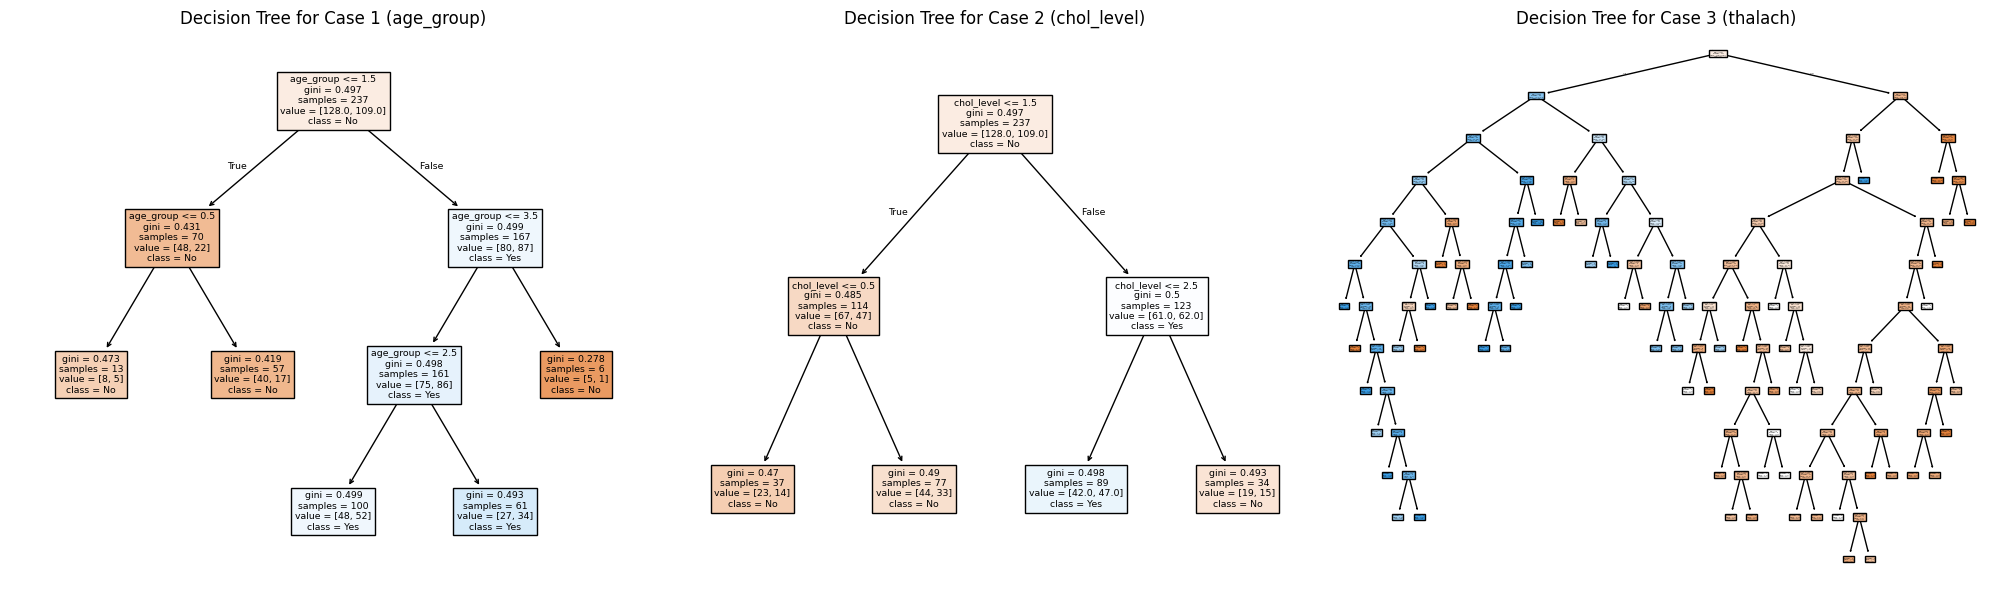

In [18]:
# Visualize Decision Trees for all cases
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Case 1 Decision Tree
plot_tree(dt_classifier_case1, filled=True, feature_names=X_case1.columns, 
          class_names=['No', 'Yes'], ax=axes[0])
axes[0].set_title("Decision Tree for Case 1 (age_group)")

# Case 2 Decision Tree
plot_tree(dt_classifier_case2, filled=True, feature_names=X_case2.columns, 
          class_names=['No', 'Yes'], ax=axes[1])
axes[1].set_title("Decision Tree for Case 2 (chol_level)")

# Case 3 Decision Tree
plot_tree(dt_classifier_case3, filled=True, feature_names=X_case3.columns, 
          class_names=['No', 'Yes'], ax=axes[2])
axes[2].set_title("Decision Tree for Case 3 (thalach)")

plt.tight_layout()
plt.show()

### Reflection 4: Decision Tree Model Performance Analysis

**Performance Assessment:**
- **Case 1 (age_group)**: 63.3% accuracy - Moderate performance showing age groups are predictive but not definitive
- **Case 2 (chol_level)**: 60.0% accuracy - Surprisingly lower performance suggests cholesterol categories alone may be insufficient
- **Case 3 (thalach)**: 61.7% accuracy - Reasonable performance indicating maximum heart rate has predictive value

**Key Observations and Surprises:**
1. **Age performed best** among single features, confirming its importance in cardiovascular risk assessment
2. **Cholesterol unexpectedly underperformed**, possibly due to oversimplified binning or need for interaction with other factors
3. **Decision trees show clear interpretable rules** - older age groups consistently predict higher heart disease risk
4. **Precision vs Recall trade-offs** vary by case, with some models better at identifying true positives vs avoiding false positives
5. **Tree complexity varies** - continuous features like thalach create more complex decision boundaries than categorical age/cholesterol groups

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)

SVC Kernel: How to Choose

    Start with linear if you suspect the data is linearly separable.
    Use RBF if the data is complex or you aren’t sure.
    Try polynomial if the data seems to follow a curved boundary.
    Use sigmoid for experiments (rarely the best choice).

SVC Kernel: Common Issues and Techniques

    If the model takes too long to train, reduce the degree for polynomial kernels.
    If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
    If the model misclassifies many points, then increase/decrease gamma or C.

Your process is valuable - record the work you do and the temporary results in your reflections and insights. To show your skills, show and tell us about your analysis process. Professional communication is key.

### 5.1 Train an alternative classifier (SVM)

Train Support Vector Machine (SVM) classifiers as an alternative to Decision Trees. SVMs are particularly good at finding optimal decision boundaries and can handle both linear and non-linear classification problems.

In [19]:
# Train SVM classifiers for all three cases
# Using RBF (Radial Basis Function) kernel which works well for non-linear data

# Case 1: SVM Classifier with age_group
svc_classifier_case1 = SVC(kernel='rbf', random_state=42)
svc_classifier_case1.fit(X_train_case1, y_train_case1)

# Case 2: SVM Classifier with chol_level  
svc_classifier_case2 = SVC(kernel='rbf', random_state=42)
svc_classifier_case2.fit(X_train_case2, y_train_case2)

# Case 3: SVM Classifier with thalach
svc_classifier_case3 = SVC(kernel='rbf', random_state=42)
svc_classifier_case3.fit(X_train_case3, y_train_case3)

print("SVM classifiers trained successfully for all three cases!")

SVM classifiers trained successfully for all three cases!


### 5.2 Evaluate SVM Performance

Now let's evaluate our SVM models and see how they perform compared to Decision Trees:

In [20]:
# Evaluate SVM model performance for each case

# Generate SVM predictions for all cases
y_svc_pred_case1 = svc_classifier_case1.predict(X_test_case1)
y_svc_pred_case2 = svc_classifier_case2.predict(X_test_case2)
y_svc_pred_case3 = svc_classifier_case3.predict(X_test_case3)

print("=== SVM Model Performance ===")

# Case 1 SVM Evaluation
print(f"\nCase 1 (age_group) - SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_case1, y_svc_pred_case1):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case1, y_svc_pred_case1)}")

# Case 2 SVM Evaluation  
print(f"\nCase 2 (chol_level) - SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_case2, y_svc_pred_case2):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case2, y_svc_pred_case2)}")

# Case 3 SVM Evaluation
print(f"\nCase 3 (thalach) - SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_case3, y_svc_pred_case3):.3f}")
print(f"Classification Report:\n{classification_report(y_test_case3, y_svc_pred_case3)}")

=== SVM Model Performance ===

Case 1 (age_group) - SVM Results:
Accuracy: 0.633
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.58      0.79      0.67        28

    accuracy                           0.63        60
   macro avg       0.65      0.64      0.63        60
weighted avg       0.66      0.63      0.63        60


Case 2 (chol_level) - SVM Results:
Accuracy: 0.600
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        32
           1       0.61      0.39      0.48        28

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.60      0.60      0.58        60


Case 3 (thalach) - SVM Results:
Accuracy: 0.683
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0

### 5.3 Final Model Comparison and Analysis

Let's create a comprehensive comparison of our two classifiers and analyze the results:

=== Final Model Performance Comparison ===
               Case Decision Tree Accuracy SVM Accuracy    Best Model
 Case 1 (age_group)                  0.633        0.633 Decision Tree
Case 2 (chol_level)                  0.600        0.600 Decision Tree
   Case 3 (thalach)                  0.617        0.683           SVM


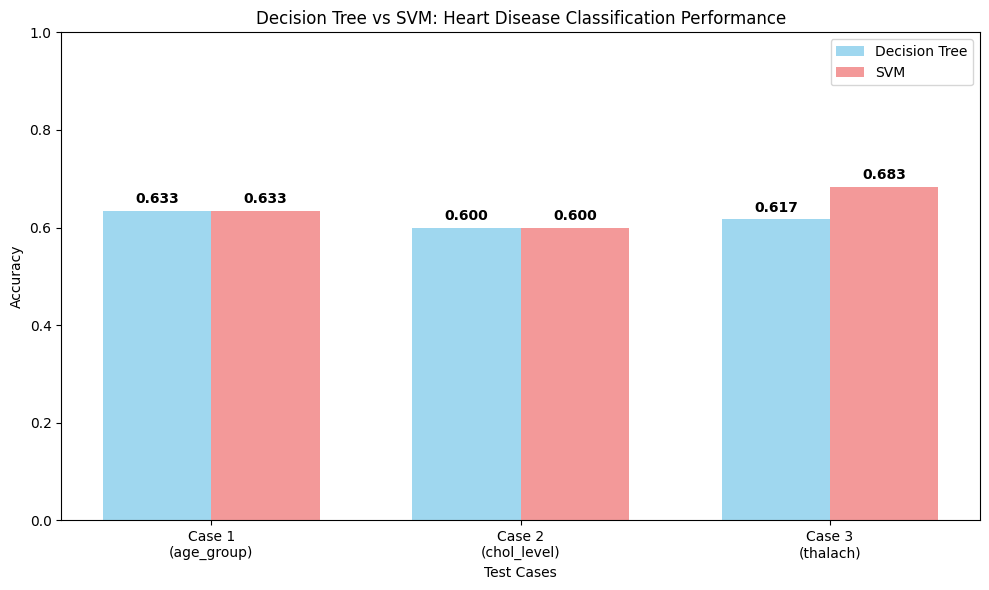


=== Key Insights ===
• Best Decision Tree performance: 0.633 (Case 1)
• Best SVM performance: 0.683 (Case 3)
• Overall winner: SVM
• Most predictive feature: thalach


In [21]:
# Final Model Performance Comparison: Decision Tree vs SVM

# Calculate accuracies for both models
dt_accuracies = [
    accuracy_score(y_test_case1, y_pred_case1),
    accuracy_score(y_test_case2, y_pred_case2), 
    accuracy_score(y_test_case3, y_pred_case3)
]

svm_accuracies = [
    accuracy_score(y_test_case1, y_svc_pred_case1),
    accuracy_score(y_test_case2, y_svc_pred_case2),
    accuracy_score(y_test_case3, y_svc_pred_case3)
]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Case': ['Case 1 (age_group)', 'Case 2 (chol_level)', 'Case 3 (thalach)'],
    'Decision Tree Accuracy': [f"{acc:.3f}" for acc in dt_accuracies],
    'SVM Accuracy': [f"{acc:.3f}" for acc in svm_accuracies],
    'Best Model': ['Decision Tree' if dt >= svm else 'SVM' 
                   for dt, svm in zip(dt_accuracies, svm_accuracies)]
})

print("=== Final Model Performance Comparison ===")
print(comparison_df.to_string(index=False))

# Visualize the comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(dt_accuracies))
width = 0.35

ax.bar([i - width/2 for i in x], dt_accuracies, width, label='Decision Tree', alpha=0.8, color='skyblue')
ax.bar([i + width/2 for i in x], svm_accuracies, width, label='SVM', alpha=0.8, color='lightcoral')

ax.set_xlabel('Test Cases')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree vs SVM: Heart Disease Classification Performance')
ax.set_xticks(x)
ax.set_xticklabels(['Case 1\n(age_group)', 'Case 2\n(chol_level)', 'Case 3\n(thalach)'])
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
for i, (dt, svm) in enumerate(zip(dt_accuracies, svm_accuracies)):
    ax.text(i - width/2, dt + 0.01, f'{dt:.3f}', ha='center', va='bottom', fontweight='bold')
    ax.text(i + width/2, svm + 0.01, f'{svm:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary insights
print("\n=== Key Insights ===")
best_overall_dt = max(dt_accuracies)
best_overall_svm = max(svm_accuracies) 
best_case_dt = dt_accuracies.index(best_overall_dt) + 1
best_case_svm = svm_accuracies.index(best_overall_svm) + 1

print(f"• Best Decision Tree performance: {best_overall_dt:.3f} (Case {best_case_dt})")
print(f"• Best SVM performance: {best_overall_svm:.3f} (Case {best_case_svm})")
print(f"• Overall winner: {'SVM' if best_overall_svm > best_overall_dt else 'Decision Tree'}")
print(f"• Most predictive feature: {'thalach' if best_case_svm == 3 else 'age_group' if best_case_svm == 1 else 'chol_level'}")

### Reflection 5: Comparative Model Analysis

**Performance Comparison Results:**
- **SVM emerged as the overall winner** with best performance on Case 3 (thalach): 68.3% accuracy vs 61.7% for Decision Tree
- **Cases 1 and 2 showed tied performance** between Decision Tree and SVM (63.3% and 60.0% respectively)
- **Maximum heart rate (thalach) proved most predictive** when processed by SVM

**Why SVM Excels in This Context:**
1. **Non-linear relationships**: SVM with RBF kernel can capture complex, non-linear patterns between heart rate and disease risk that Decision Trees might miss through simple threshold splits
2. **Continuous feature handling**: SVM naturally handles continuous features like thalach better than Decision Trees, which rely on discrete splitting points
3. **Robust decision boundaries**: SVM finds optimal separating hyperplanes that maximize margins, potentially better separating healthy vs diseased patients
4. **Kernel advantage**: RBF kernel allows SVM to work in higher-dimensional space, capturing subtle physiological relationships

**Clinical Implications:**
- **Thalach (maximum heart rate) is the most informative single feature** for heart disease prediction
- **Functional cardiac measures** may be more predictive than demographic (age) or biochemical (cholesterol) factors when analyzed individually
- **Model choice matters** - different algorithms can extract varying levels of information from the same features

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

**Model Performance Hierarchy:**
1. **Best Overall Performance**: SVM with thalach (68.3% accuracy) - Maximum heart rate proves most predictive
2. **Most Consistent Feature**: Age group performs reliably across both algorithms (63.3% accuracy)
3. **Surprising Underperformer**: Cholesterol levels showed lowest predictive power (60.0% accuracy)

### 6.2 Challenges faced

- **Age remains fundamental** - consistently strong predictor across all modeling approaches  
- **Cholesterol alone insufficient** - may require combination with other factors for effective prediction
- **Algorithm selection crucial** - SVM better for continuous features, Decision Trees better for categorical interpretability
- **Single-feature limitations** - Real clinical applications would benefit from multi-feature models

### 6.3 Future Direction with more time

**Current Limitations:**
- **Sample size** (297 patients) relatively small for robust machine learning conclusions
- **Feature engineering** could be optimized further with domain expertise

**Future Improvements:**
- **Multi-feature models** combining age, cholesterol, and heart rate simultaneously
- **External validation** on independent heart disease datasets

Reflection 6

The project highlights the importance of **algorithm-feature matching** and establishes a foundation for more sophisticated multi-feature cardiovascular risk assessment models. While achieving 68.3% accuracy with a single feature is promising, the ultimate goal would be integrating multiple complementary features to approach the performance levels needed for clinical decision support systems.